In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
import warnings

plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

In [5]:
tun_data = pd.read_csv("/content/drive/MyDrive/최종프로젝트_ AI엔지니어링/유저분류 클러스터링 최종 정리/data/유저데이터+순자산.csv")

In [6]:
tun_data['매우낮은위험'] = 0
tun_data['낮은위험'] = 0
tun_data['보통위험'] = 0
tun_data['다소높은위험'] = 0
tun_data['높은위험'] = 0
tun_data['매우높은위험'] = 0

In [7]:
tun_data.head()

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),순자산,매우낮은위험,낮은위험,보통위험,다소높은위험,높은위험,매우높은위험
0,user1,1234,남자,60,Y,383,5036.764706,4110.0,926.764706,2446,5074.0,12556.764706,40.408498,7482.764706,0,0,0,0,0,0
1,user2,1234,여자,30,Y,383,2392.857143,1474.0,918.857143,2002,9443.0,13837.857143,68.240334,4394.857143,0,0,0,0,0,0
2,user3,1234,남자,40,Y,577,2206.802721,1622.0,584.802721,1323,3441.0,6970.802721,49.363038,3529.802721,0,0,0,0,0,0
3,user4,1234,남자,60,Y,383,1528.186275,1247.0,281.186275,4707,4490.0,10725.186275,41.864075,6235.186275,0,0,0,0,0,0
4,user5,1234,여자,30,Y,383,2358.766234,1453.0,905.766234,617,5030.0,8005.766234,62.829714,2975.766234,0,0,0,0,0,0


In [8]:
# tun_data.to_csv("alluser_investsp.csv", index=False)

In [9]:
np.random.seed(42)

# 각 컬럼에 0~6 사이의 랜덤 값을 삽입
for column in ["매우낮은위험", "낮은위험", "보통위험", "다소높은위험", "높은위험", "매우높은위험"]:
    tun_data[column] = np.random.randint(0, 7, size=len(tun_data))

In [10]:
tun_data.head()

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,부채액,금융자산 총액,자본 대비 부채액(%),순자산,매우낮은위험,낮은위험,보통위험,다소높은위험,높은위험,매우높은위험
0,user1,1234,남자,60,Y,383,5036.764706,4110.0,926.764706,2446,5074.0,12556.764706,40.408498,7482.764706,6,0,2,0,0,3
1,user2,1234,여자,30,Y,383,2392.857143,1474.0,918.857143,2002,9443.0,13837.857143,68.240334,4394.857143,3,5,3,3,1,4
2,user3,1234,남자,40,Y,577,2206.802721,1622.0,584.802721,1323,3441.0,6970.802721,49.363038,3529.802721,4,1,6,6,1,3
3,user4,1234,남자,60,Y,383,1528.186275,1247.0,281.186275,4707,4490.0,10725.186275,41.864075,6235.186275,6,0,1,1,1,1
4,user5,1234,여자,30,Y,383,2358.766234,1453.0,905.766234,617,5030.0,8005.766234,62.829714,2975.766234,2,2,6,3,0,0


In [11]:
# tun_data.to_csv("1123_투자성향지수분석데이터추가.csv", index=False)

# 위험감수지수

공식: (매우낮은 위험 상품 수 * 1 + 낮은위험 상품 수 * 2 + .... + 매우높은위험 * 6) / 총 상품 구매 수

In [12]:
tun_data['위험감수지수'] = ((tun_data['매우낮은위험'] * 1) + (tun_data['낮은위험'] * 2) + (tun_data['보통위험'] * 3) + (tun_data['다소높은위험'] * 4) + (tun_data['높은위험'] * 5) + (tun_data['매우높은위험'] * 6)) / (tun_data['매우낮은위험'] + tun_data['낮은위험'] + tun_data['보통위험'] + tun_data['다소높은위험'] + tun_data['높은위험'] + tun_data['매우높은위험'])
tun_data

,ID,비밀번호,성별,나이,직장,월소득,저축액,예금보유액,적금보유액,펀드보유액,...,금융자산 총액,자본 대비 부채액(%),순자산,매우낮은위험,낮은위험,보통위험,다소높은위험,높은위험,매우높은위험,위험감수지수
0,user1,1234,남자,60,Y,383,5036.764706,4110.0,926.764706,2446,...,12556.764706,40.408498,7482.764706,6,0,2,0,0,3,2.727273
1,user2,1234,여자,30,Y,383,2392.857143,1474.0,918.857143,2002,...,13837.857143,68.240334,4394.857143,3,5,3,3,1,4,3.315789
2,user3,1234,남자,40,Y,577,2206.802721,1622.0,584.802721,1323,...,6970.802721,49.363038,3529.802721,4,1,6,6,1,3,3.380952
3,user4,1234,남자,60,Y,383,1528.186275,1247.0,281.186275,4707,...,10725.186275,41.864075,6235.186275,6,0,1,1,1,1,2.400000
4,user5,1234,여자,30,Y,383,2358.766234,1453.0,905.766234,617,...,8005.766234,62.829714,2975.766234,2,2,6,3,0,0,2.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86304,user86305,1234,남자,40,N,223,4082.000000,3822.0,260.000000,3193,...,14612.000000,50.212154,7275.000000,6,5,4,1,5,5,3.346154
86305,user86306,1234,여자,30,Y,266,2687.000000,1190.0,1497.000000,1177,...,15180.000000,74.545455,3864.000000,2,3,5,4,6,2,3.681818
86306,user86307,1234,남자,50,Y,587,4202.000000,2706.0,1496.000000,3112,...,22396.000000,67.342383,7314.000000,4,6,2,6,5,3,3.423077
86307,user86308,1234,여자,40,Y,285,4054.000000,2603.0,1451.000000,1112,...,10507.000000,50.832778,5166.000000,5,1,3,1,0,0,2.000000


# 펀드 상품 분석 진행


In [13]:
fund_item = pd.read_csv("/content/drive/MyDrive/최종프로젝트_ AI엔지니어링/유저분류 클러스터링 최종 정리/data/1123_펀드상품데이터.csv")
fund_item

,상품명,상품 유형,위험도,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),"총 보수비용(연, %)",운용사,상품 요약
0,AB글로벌고수익증권투자신탁(채권-재간접형)Ce-P2,"채권형,재간접투자",보통위험,0.47,2.39,4.46,12.55,0.427,AB자산운용,보통위험을 감수할 수 있는 안정성을 추구하면서도 약간의 변화를 받아들일 수 있는 분...
1,AB미국그로스UH증권투자신탁[주식-재간접형]Ce-P2,"주식형,재간접투자",높은위험,8.43,16.14,15.68,44.22,0.521,얼라이언스 번스타인,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
2,AB미국그로스증권투자신탁(주식-재간접형)Ce-P2,"주식형,재간접투자",높은위험,4.23,12.67,11.48,33.69,0.523,AB자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
3,AB셀렉트미국증권투자신탁[주식-재간접형]Ce-P2,주식형,다소높은위험,3.48,10.62,12.63,33.74,0.628,AB자산운용,다소높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추...
4,BNK삼성전자중소형증권투자신탁1호(주식)C-P2e,주식형,높은위험,-4.08,-8.29,-8.53,14.47,0.771,BNK자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
...,...,...,...,...,...,...,...,...,...,...
338,한화중국본토증권자투자신탁H(주식)C-RPe(퇴직연금),주식형,높은위험,0.66,21.96,12.21,18.93,1.000,한화자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
339,한화천연자원증권자투자신탁[주식]P-E,주식형,높은위험,-0.68,3.32,-1.88,15.78,1.309,한화자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
340,한화코리아밸류채권증권자투자신탁[채권]C-RPe,채권형,낮은위험,0.32,0.94,2.57,6.2,0.259,한화자산운용,낮은위험을 감수할 수 있는 안정성을 가장 중요하게 생각하시는 분께 추천드리는 채권형...
341,현대강소기업증권자투자신탁1호[주식]C-P2e,주식형,높은위험,-18.37,-24.32,-34.37,-25.12,0.721,현대자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...


In [14]:
# 매우 낮은 위험도는 1, 낮은 위험도는 2

fund_item['위험도'].unique()

array(['보통위험', '높은위험', '다소높은위험', '낮은위험', '매우높은위험', '매우낮은위험'], dtype=object)

In [15]:
fund_item['위험도'] = fund_item['위험도'].replace({'매우낮은위험':1, '낮은위험':2, '보통위험':3, '다소높은위험':4, '높은위험':5, '매우높은위험':6})
fund_item.head()

,상품명,상품 유형,위험도,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),"총 보수비용(연, %)",운용사,상품 요약
0,AB글로벌고수익증권투자신탁(채권-재간접형)Ce-P2,"채권형,재간접투자",3,0.47,2.39,4.46,12.55,0.427,AB자산운용,보통위험을 감수할 수 있는 안정성을 추구하면서도 약간의 변화를 받아들일 수 있는 분...
1,AB미국그로스UH증권투자신탁[주식-재간접형]Ce-P2,"주식형,재간접투자",5,8.43,16.14,15.68,44.22,0.521,얼라이언스 번스타인,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
2,AB미국그로스증권투자신탁(주식-재간접형)Ce-P2,"주식형,재간접투자",5,4.23,12.67,11.48,33.69,0.523,AB자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
3,AB셀렉트미국증권투자신탁[주식-재간접형]Ce-P2,주식형,4,3.48,10.62,12.63,33.74,0.628,AB자산운용,다소높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추...
4,BNK삼성전자중소형증권투자신탁1호(주식)C-P2e,주식형,5,-4.08,-8.29,-8.53,14.47,0.771,BNK자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...


In [16]:
fund_item.isnull().sum()

,0
상품명,0
상품 유형,0
위험도,0
1개월 수익률(연환산수익률)(%),0
3개월 수익률(연환산수익률)(%),0
6개월 수익률(연환산수익률)(%),0
12개월 수익률(연환산수익률)(%),0
"총 보수비용(연, %)",0
운용사,0
상품 요약,0


In [17]:
# 연환산 수익률 타입을 float로 변경

fund_item['12개월 수익률(연환산수익률)(%)'] = pd.to_numeric(fund_item['12개월 수익률(연환산수익률)(%)'], errors='coerce')
fund_item['1개월 수익률(연환산수익률)(%)'] = pd.to_numeric(fund_item['1개월 수익률(연환산수익률)(%)'], errors='coerce')
fund_item['3개월 수익률(연환산수익률)(%)'] = pd.to_numeric(fund_item['3개월 수익률(연환산수익률)(%)'], errors='coerce')
fund_item['6개월 수익률(연환산수익률)(%)'] = pd.to_numeric(fund_item['6개월 수익률(연환산수익률)(%)'], errors='coerce')

In [18]:
fund_item.isnull().sum()

,0
상품명,0
상품 유형,0
위험도,0
1개월 수익률(연환산수익률)(%),0
3개월 수익률(연환산수익률)(%),2
6개월 수익률(연환산수익률)(%),6
12개월 수익률(연환산수익률)(%),9
"총 보수비용(연, %)",0
운용사,0
상품 요약,0


In [19]:
fund_item.dropna(inplace=True)

In [20]:
fund_item

,상품명,상품 유형,위험도,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),"총 보수비용(연, %)",운용사,상품 요약
0,AB글로벌고수익증권투자신탁(채권-재간접형)Ce-P2,"채권형,재간접투자",3,0.47,2.39,4.46,12.55,0.427,AB자산운용,보통위험을 감수할 수 있는 안정성을 추구하면서도 약간의 변화를 받아들일 수 있는 분...
1,AB미국그로스UH증권투자신탁[주식-재간접형]Ce-P2,"주식형,재간접투자",5,8.43,16.14,15.68,44.22,0.521,얼라이언스 번스타인,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
2,AB미국그로스증권투자신탁(주식-재간접형)Ce-P2,"주식형,재간접투자",5,4.23,12.67,11.48,33.69,0.523,AB자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
3,AB셀렉트미국증권투자신탁[주식-재간접형]Ce-P2,주식형,4,3.48,10.62,12.63,33.74,0.628,AB자산운용,다소높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추...
4,BNK삼성전자중소형증권투자신탁1호(주식)C-P2e,주식형,5,-4.08,-8.29,-8.53,14.47,0.771,BNK자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
...,...,...,...,...,...,...,...,...,...,...
338,한화중국본토증권자투자신탁H(주식)C-RPe(퇴직연금),주식형,5,0.66,21.96,12.21,18.93,1.000,한화자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
339,한화천연자원증권자투자신탁[주식]P-E,주식형,5,-0.68,3.32,-1.88,15.78,1.309,한화자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...
340,한화코리아밸류채권증권자투자신탁[채권]C-RPe,채권형,2,0.32,0.94,2.57,6.20,0.259,한화자산운용,낮은위험을 감수할 수 있는 안정성을 가장 중요하게 생각하시는 분께 추천드리는 채권형...
341,현대강소기업증권자투자신탁1호[주식]C-P2e,주식형,5,-18.37,-24.32,-34.37,-25.12,0.721,현대자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...


# 펀드 상품 데이터 EDA

In [21]:
fund_item.groupby('위험도')[['1개월 수익률(연환산수익률)(%)', '3개월 수익률(연환산수익률)(%)', '6개월 수익률(연환산수익률)(%)','12개월 수익률(연환산수익률)(%)']].mean()

,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%)
위험도,,,,
1,0.275000,0.842500,1.871250,4.116250
2,-0.038222,0.408889,1.880889,6.511111
3,-0.225843,0.955843,2.258989,10.741348
4,0.975067,4.784800,5.435467,19.828800
5,-0.085421,5.276636,3.863832,21.634860
6,-5.160000,0.645000,-5.289000,12.891000


In [22]:
a = fund_item.groupby('운용사')[['1개월 수익률(연환산수익률)(%)', '3개월 수익률(연환산수익률)(%)', '6개월 수익률(연환산수익률)(%)','12개월 수익률(연환산수익률)(%)']].median().reset_index()
a

,운용사,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%)
0,AB자산운용,3.480,10.620,11.480,33.690
1,BNK자산운용,-4.780,-7.500,-8.925,10.385
2,DB자산운용,-9.470,4.670,15.630,44.380
3,HDC자산운용,-1.445,-1.715,-0.920,4.655
4,KB자산운용,1.450,5.410,6.380,18.250
5,NH-Amundi자산운용,-3.370,-3.855,-3.245,7.685
6,iM에셋자산운용,-2.980,1.890,-2.100,10.130
7,교보악사자산운용,0.680,4.820,5.350,19.670
8,다올자산운용,0.370,3.240,3.550,14.350
9,마이다스에셋자산운용,0.260,0.680,0.420,5.520


In [23]:
b = fund_item.groupby('운용사')[['상품명']].count().reset_index()
b

,운용사,상품명
0,AB자산운용,3
1,BNK자산운용,2
2,DB자산운용,1
3,HDC자산운용,2
4,KB자산운용,15
5,NH-Amundi자산운용,4
6,iM에셋자산운용,5
7,교보악사자산운용,11
8,다올자산운용,9
9,마이다스에셋자산운용,5


In [24]:
c = fund_item.groupby('운용사')['위험도'].mean().reset_index()
c

,운용사,위험도
0,AB자산운용,4.000000
1,BNK자산운용,5.000000
2,DB자산운용,5.000000
3,HDC자산운용,2.500000
4,KB자산운용,3.933333
5,NH-Amundi자산운용,4.500000
6,iM에셋자산운용,5.000000
7,교보악사자산운용,3.818182
8,다올자산운용,4.111111
9,마이다스에셋자산운용,3.400000


In [25]:
d = fund_item.groupby('운용사')['위험도'].value_counts().reset_index()
d

,운용사,위험도,count
0,AB자산운용,3,1
1,AB자산운용,4,1
2,AB자산운용,5,1
3,BNK자산운용,5,2
4,DB자산운용,5,1
...,...,...,...
107,한화자산운용,1,1
108,한화자산운용,3,1
109,한화자산운용,6,1
110,현대자산운용,5,1


In [26]:
# 데이터 피벗테이블 생성: 운용사별 위험도별 상품 개수
pivot_table = d.pivot_table(
    index='운용사',       # 행: 운용사
    columns='위험도',    # 열: 위험도
    values='count',      # 값: 상품 개수
    aggfunc='sum',       # 집계 함수: 합계
    fill_value=0         # NaN 값은 0으로 채움
)

# 열 이름 정렬 및 재명명
pivot_table = pivot_table.reindex(columns=range(1, 7), fill_value=0)  # 위험도 1~6 순서 보장
pivot_table.columns = [f"위험도 {i} 상품" for i in range(1, 7)]  # 열 이름 변경

pivot_table.reset_index()

,운용사,위험도 1 상품,위험도 2 상품,위험도 3 상품,위험도 4 상품,위험도 5 상품,위험도 6 상품
0,AB자산운용,0,0,1,1,1,0
1,BNK자산운용,0,0,0,0,2,0
2,DB자산운용,0,0,0,0,1,0
3,HDC자산운용,0,1,1,0,0,0
4,KB자산운용,0,1,3,8,2,1
5,NH-Amundi자산운용,0,0,1,0,3,0
6,iM에셋자산운용,0,0,1,1,0,3
7,교보악사자산운용,0,1,3,4,3,0
8,다올자산운용,0,1,3,0,4,1
9,마이다스에셋자산운용,0,2,1,0,2,0


#

In [27]:
# a,b,c를 운용사를 기준으로 join

ab = pd.merge(a,b, on='운용사')
abc = pd.merge(ab, c, on='운용사')

In [28]:
join_fund_table = pd.merge(abc, pivot_table, on='운용사')

In [29]:
join_fund_table.rename(columns={'상품명':'상품 총 개수', '위험도': '전체 상품 위험도의 평균'}, inplace=True)

In [30]:
join_fund_table

,운용사,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),상품 총 개수,전체 상품 위험도의 평균,위험도 1 상품,위험도 2 상품,위험도 3 상품,위험도 4 상품,위험도 5 상품,위험도 6 상품
0,AB자산운용,3.480,10.620,11.480,33.690,3,4.000000,0,0,1,1,1,0
1,BNK자산운용,-4.780,-7.500,-8.925,10.385,2,5.000000,0,0,0,0,2,0
2,DB자산운용,-9.470,4.670,15.630,44.380,1,5.000000,0,0,0,0,1,0
3,HDC자산운용,-1.445,-1.715,-0.920,4.655,2,2.500000,0,1,1,0,0,0
4,KB자산운용,1.450,5.410,6.380,18.250,15,3.933333,0,1,3,8,2,1
5,NH-Amundi자산운용,-3.370,-3.855,-3.245,7.685,4,4.500000,0,0,1,0,3,0
6,iM에셋자산운용,-2.980,1.890,-2.100,10.130,5,5.000000,0,0,1,1,0,3
7,교보악사자산운용,0.680,4.820,5.350,19.670,11,3.818182,0,1,3,4,3,0
8,다올자산운용,0.370,3.240,3.550,14.350,9,4.111111,0,1,3,0,4,1
9,마이다스에셋자산운용,0.260,0.680,0.420,5.520,5,3.400000,0,2,1,0,2,0


In [31]:
join_fund_table.to_csv("1128_펀드상품운용사별정리.csv", index=False)

# 수익률, 위험-수익 비율, 상품 다양성을 고려한 운용사별 순위 산출

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 로드
file_path = '/content/1128_펀드상품운용사별정리.csv'
data = pd.read_csv(file_path)

# 2. 컬럼명 정리 (공백 제거)
data.columns = data.columns.str.strip()

# 3. 추가 데이터 계산
# (1) 평균 수익률 계산
data['평균 수익률'] = data[
    ['1개월 수익률(연환산수익률)(%)', '3개월 수익률(연환산수익률)(%)',
     '6개월 수익률(연환산수익률)(%)', '12개월 수익률(연환산수익률)(%)']
].mean(axis=1)

# (2) 위험-수익 비율 계산
data['위험-수익 비율'] = data['평균 수익률'] / data['전체 상품 위험도의 평균']

# (3) 상품 다양성 점수 계산
diversity_columns = ['위험도 1 상품', '위험도 2 상품', '위험도 3 상품',
                     '위험도 4 상품', '위험도 5 상품', '위험도 6 상품']
data['상품 다양성 점수'] = data['상품 총 개수'] + data[diversity_columns].std(axis=1)

# 4. 정규화
scaler = MinMaxScaler()
data[['수익률 점수', '위험-수익 점수', '다양성 점수']] = scaler.fit_transform(
    data[['평균 수익률', '위험-수익 비율', '상품 다양성 점수']]
)

# 5. 종합 점수 계산
weights = {'수익률': 0.4, '위험-수익': 0.4, '다양성': 0.2}
data['종합 점수'] = (
    weights['수익률'] * data['수익률 점수'] +
    weights['위험-수익'] * data['위험-수익 점수'] +
    weights['다양성'] * data['다양성 점수']
)

# 6. 순위 산출
data['순위'] = data['종합 점수'].rank(ascending=False)

# 7. 결과 정렬 및 출력
result = data[['운용사', '종합 점수', '순위']].sort_values(by='순위')
result

,운용사,종합 점수,순위
19,얼라이언스 번스타인,0.800000,1.0
34,한국투자신탁운용,0.776581,2.0
13,삼성자산운용,0.762626,3.0
0,AB자산운용,0.733902,4.0
29,키움투자자산운용,0.718948,5.0
16,신한자산운용,0.694751,6.0
10,미래에셋자산운용,0.691077,7.0
21,우리자산운용,0.684485,8.0
2,DB자산운용,0.674589,9.0
4,KB자산운용,0.669424,10.0


In [33]:
pd.merge(result, join_fund_table[['운용사', '전체 상품 위험도의 평균', '상품 총 개수']], on='운용사').to_csv("1128_펀드상품운용사별순위.csv", index=False)

# 상품별 순위 산출(운용사 순위를 기반으로)

In [34]:
# 기존 상품 데이터 불러오기
product_data = fund_item

# 1.2 데이터 전처리 (운용사 데이터)
product_data.columns = product_data.columns.str.strip()  # 공백 제거


# 3.1 평균 수익률 계산
product_data['평균 수익률'] = product_data[
    ['1개월 수익률(연환산수익률)(%)', '3개월 수익률(연환산수익률)(%)',
     '6개월 수익률(연환산수익률)(%)', '12개월 수익률(연환산수익률)(%)']
].mean(axis=1)

# 3.2 위험 대비 수익률 계산
product_data['위험 대비 수익률'] = product_data['평균 수익률'] / product_data['위험도']

# 3.3 비용 효율성 점수 계산
product_data['비용 효율성'] = 1 / product_data['총 보수비용(연, %)']

# 3.4 운용사 점수와 상품 데이터 매핑
merged_data = product_data.merge(result[['운용사', '종합 점수']], on='운용사', how='left')

# 3.5 정규화 및 점수 계산
merged_data[['수익률 점수', '위험 대비 점수', '비용 점수', '운용사 점수']] = scaler.fit_transform(
    merged_data[['평균 수익률', '위험 대비 수익률', '비용 효율성', '종합 점수']]
)

# 3.6 가중치 설정 및 종합 점수 계산
product_weights = {'수익률': 0.4, '위험 대비': 0.3, '비용': 0.2, '운용사': 0.1}
merged_data['상품 종합 점수'] = (
    product_weights['수익률'] * merged_data['수익률 점수'] +
    product_weights['위험 대비'] * merged_data['위험 대비 점수'] +
    product_weights['비용'] * merged_data['비용 점수'] +
    product_weights['운용사'] * merged_data['운용사 점수']
)

# 3.7 순위 산출
merged_data['상품 순위'] = merged_data['상품 종합 점수'].rank(ascending=False)


In [48]:
merged_data.sort_values('상품 순위').head(30)

,상품명,상품 유형,위험도,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),"총 보수비용(연, %)",운용사,상품 요약,평균 수익률,위험 대비 수익률,비용 효율성,종합 점수,수익률 점수,위험 대비 점수,비용 점수,운용사 점수,상품 종합 점수,상품 순위
230,키움글로벌구독경제증권자투자신탁제2호(UH)[주식]C-P2e,주식형,5,12.05,20.52,25.55,52.45,1.300,키움투자자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,27.6425,5.528500,0.769231,0.718948,1.000000,1.000000,0.010615,0.898685,0.791992,1.0
228,키움글로벌구독경제증권자투자신탁(UH)[주식]C-P2e,주식형,5,12.02,20.48,25.50,52.37,1.303,키움투자자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,27.5925,5.518500,0.767460,0.718948,0.999060,0.999060,0.010430,0.898685,0.791296,2.0
115,삼성글로벌메타버스증권자투자신탁UH[주식]Cpe,주식형,5,9.54,21.15,22.76,48.64,1.263,삼성자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,25.5225,5.104500,0.791766,0.762626,0.960141,0.960141,0.012978,0.953283,0.770023,3.0
234,키움글로벌차세대IT&네트워크증권자투자신탁(UH)[주식]C-P2e,주식형,5,10.23,21.33,21.61,50.14,1.257,키움투자자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,25.8275,5.165500,0.795545,0.718948,0.965875,0.965875,0.013375,0.898685,0.768656,4.0
161,신한미국나스닥100인덱스증권자투자신탁(UH)[주식-파생형]C-re,주식형,5,8.09,16.35,18.71,42.43,0.300,신한자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,21.3950,4.279000,3.333333,0.694751,0.882538,0.882538,0.279500,0.868439,0.760521,5.0
299,한국투자글로벌AI&반도체TOP10증권자투자신탁UH(주식)C-Re,주식형,5,7.12,16.24,20.08,53.61,1.196,한국투자신탁운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,24.2625,4.852500,0.836120,0.776581,0.936451,0.936451,0.017630,0.970726,0.756114,6.0
63,다올글로벌메타버스&우주산업1등주증권자투자신탁(UH)[주식]CPe,주식형,5,8.14,18.25,22.45,53.70,1.053,다올자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,25.6350,5.127000,0.949668,0.583955,0.962256,0.962256,0.029537,0.729944,0.752481,7.0
159,신한미국S&P500인덱스증권자투자신탁(UH)[주식-파생형]C-re,주식형,5,7.46,14.76,17.61,42.21,0.295,신한자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,20.5100,4.102000,3.389831,0.694751,0.865899,0.865899,0.285424,0.868439,0.750058,8.0
229,키움글로벌구독경제증권자투자신탁제2호(H)[주식]C-P2e,주식형,5,9.14,18.50,23.00,44.70,1.301,키움투자자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,23.8350,4.767000,0.768640,0.718948,0.928414,0.928414,0.010553,0.898685,0.741869,9.0
1,AB미국그로스UH증권투자신탁[주식-재간접형]Ce-P2,"주식형,재간접투자",5,8.43,16.14,15.68,44.22,0.521,얼라이언스 번스타인,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,21.1175,4.223500,1.919386,0.800000,0.877321,0.877321,0.131226,1.000000,0.740370,10.0


In [36]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 18.5 MB/s eta 0:00:00


## 알고리즘 생성 과정에서 수익률 지표를 중복해서 적용한 것을 확인.

## -> 다중공선성이 발생했을 가능성이 있으므로 피쳐들에 대한 상관관계와 다중공선성 측정

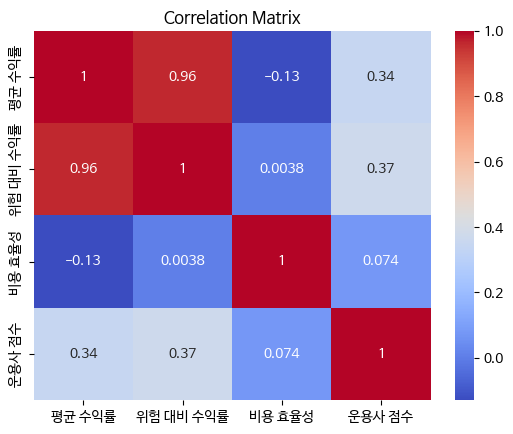

          변수        VIF
0     평균 수익률  17.716259
1  위험 대비 수익률  17.607286
2     비용 효율성   1.322313
3     운용사 점수   1.164977
4   constant  41.454391


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬
correlation_matrix = merged_data[['평균 수익률', '위험 대비 수익률', '비용 효율성', '운용사 점수']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# VIF 계산
X = merged_data[['평균 수익률', '위험 대비 수익률', '비용 효율성', '운용사 점수']]
X['constant'] = 1  # 상수를 추가
vif = pd.DataFrame()
vif['변수'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

In [38]:
# '평균 수익률' 변수 제거
filtered_data = merged_data.drop(columns=['평균 수익률'])

# VIF 재계산
X = filtered_data[['위험 대비 수익률', '비용 효율성', '운용사 점수']]
X['constant'] = 1  # 상수를 추가
vif = pd.DataFrame()
vif['변수'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# 점수 계산에 '위험 대비 수익률'만 사용
filtered_data['상품 종합 점수'] = (
    product_weights['위험 대비'] * filtered_data['위험 대비 수익률'] +
    product_weights['비용'] * filtered_data['비용 효율성'] +
    product_weights['운용사'] * filtered_data['운용사 점수']
)
filtered_data['상품 순위'] = filtered_data['상품 종합 점수'].rank(ascending=False)


          변수        VIF
0  위험 대비 수익률   1.158513
1     비용 효율성   1.006139
2     운용사 점수   1.164861
3   constant  41.240933


In [39]:
filtered_data

,상품명,상품 유형,위험도,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),"총 보수비용(연, %)",운용사,상품 요약,위험 대비 수익률,비용 효율성,종합 점수,수익률 점수,위험 대비 점수,비용 점수,운용사 점수,상품 종합 점수,상품 순위
0,AB글로벌고수익증권투자신탁(채권-재간접형)Ce-P2,"채권형,재간접투자",3,0.47,2.39,4.46,12.55,0.427,AB자산운용,보통위험을 감수할 수 있는 안정성을 추구하면서도 약간의 변화를 받아들일 수 있는 분...,1.655833,2.341920,0.733902,0.573678,0.635942,0.175535,0.917377,1.056872,149.0
1,AB미국그로스UH증권투자신탁[주식-재간접형]Ce-P2,"주식형,재간접투자",5,8.43,16.14,15.68,44.22,0.521,얼라이언스 번스타인,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,4.223500,1.919386,0.800000,0.877321,0.877321,0.131226,1.000000,1.750927,12.0
2,AB미국그로스증권투자신탁(주식-재간접형)Ce-P2,"주식형,재간접투자",5,4.23,12.67,11.48,33.69,0.523,AB자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,3.103500,1.912046,0.733902,0.772033,0.772033,0.130456,0.917377,1.405197,36.0
3,AB셀렉트미국증권투자신탁[주식-재간접형]Ce-P2,주식형,4,3.48,10.62,12.63,33.74,0.628,AB자산운용,다소높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추...,3.779375,1.592357,0.733902,0.764512,0.835570,0.096932,0.917377,1.544022,24.0
4,BNK삼성전자중소형증권투자신탁1호(주식)C-P2e,주식형,5,-4.08,-8.29,-8.53,14.47,0.771,BNK자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,-0.321500,1.297017,0.398263,0.450059,0.450059,0.065962,0.497829,0.212736,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,한화중국본토증권자투자신탁H(주식)C-RPe(퇴직연금),주식형,5,0.66,21.96,12.21,18.93,1.000,한화자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,2.688000,1.000000,0.649450,0.732973,0.732973,0.034815,0.811813,1.087581,128.0
330,한화천연자원증권자투자신탁[주식]P-E,주식형,5,-0.68,3.32,-1.88,15.78,1.309,한화자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,0.827000,0.763942,0.649450,0.558026,0.558026,0.010061,0.811813,0.482070,255.0
331,한화코리아밸류채권증권자투자신탁[채권]C-RPe,채권형,2,0.32,0.94,2.57,6.20,0.259,한화자산운용,낮은위험을 감수할 수 있는 안정성을 가장 중요하게 생각하시는 분께 추천드리는 채권형...,1.253750,3.861004,0.649450,0.527427,0.598143,0.334834,0.811813,1.229507,73.0
332,현대강소기업증권자투자신탁1호[주식]C-P2e,주식형,5,-18.37,-24.32,-34.37,-25.12,0.721,현대자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,-5.109000,1.386963,0.000000,0.000000,0.000000,0.075394,0.000000,-1.255307,334.0


In [40]:
filtered_data.sort_values("상품 순위").head()

,상품명,상품 유형,위험도,1개월 수익률(연환산수익률)(%),3개월 수익률(연환산수익률)(%),6개월 수익률(연환산수익률)(%),12개월 수익률(연환산수익률)(%),"총 보수비용(연, %)",운용사,상품 요약,위험 대비 수익률,비용 효율성,종합 점수,수익률 점수,위험 대비 점수,비용 점수,운용사 점수,상품 종합 점수,상품 순위
303,매우낮은위험 e전용 한국투자신종법인용MMF3호(국공채)C-Re,MMF,1,0.27,0.85,1.72,3.55,0.098,한국투자신탁운용,매우낮은위험을 감수할 수 있는 안정성을 가장 중요하게 생각하시는 분께 추천드리는 M...,1.5975,10.204082,0.776581,0.510317,0.630458,1.000000,0.970726,2.617139,1.0
161,신한미국나스닥100인덱스증권자투자신탁(UH)[주식-파생형]C-re,주식형,5,8.09,16.35,18.71,42.43,0.300,신한자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,4.2790,3.333333,0.694751,0.882538,0.882538,0.279500,0.868439,2.037211,2.0
159,신한미국S&P500인덱스증권자투자신탁(UH)[주식-파생형]C-re,주식형,5,7.46,14.76,17.61,42.21,0.295,신한자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,4.1020,3.389831,0.694751,0.865899,0.865899,0.285424,0.868439,1.995410,3.0
327,매우낮은위험 e전용 한화단기국공채증권자투자신탁(채권)종류C-RPe(퇴직연금),채권형,1,0.25,0.79,1.81,3.99,0.150,한화자산운용,매우낮은위험을 감수할 수 있는 안정성을 가장 중요하게 생각하시는 분께 추천드리는 채...,1.7100,6.666667,0.649450,0.512432,0.641034,0.629049,0.811813,1.927515,4.0
230,키움글로벌구독경제증권자투자신탁제2호(UH)[주식]C-P2e,주식형,5,12.05,20.52,25.55,52.45,1.300,키움투자자산운용,높은위험을 감수할 수 있는 높은 위험을 감수하며 높은 수익을 기대하시는 분께 추천드...,5.5285,0.769231,0.718948,1.000000,1.000000,0.010615,0.898685,1.902265,5.0


In [53]:
filtered_data[['상품명', '위험도', '위험 대비 수익률', '상품 종합 점수', '비용 효율성','상품 순위']].sort_values("상품 순위").head()

,상품명,위험도,위험 대비 수익률,상품 종합 점수,비용 효율성,상품 순위
303,매우낮은위험 e전용 한국투자신종법인용MMF3호(국공채)C-Re,1,1.5975,2.617139,10.204082,1.0
161,신한미국나스닥100인덱스증권자투자신탁(UH)[주식-파생형]C-re,5,4.2790,2.037211,3.333333,2.0
159,신한미국S&P500인덱스증권자투자신탁(UH)[주식-파생형]C-re,5,4.1020,1.995410,3.389831,3.0
327,매우낮은위험 e전용 한화단기국공채증권자투자신탁(채권)종류C-RPe(퇴직연금),1,1.7100,1.927515,6.666667,4.0
230,키움글로벌구독경제증권자투자신탁제2호(UH)[주식]C-P2e,5,5.5285,1.902265,0.769231,5.0


## 벡터 DB에 입력할 csv파일로 저장

In [41]:
filtered_data.sort_values("상품 순위").to_csv("상품별순위(운용사순위반영).csv", index=False)

# 상품 클러스터링 -> 12개월 수익률과 위험도를 기준으로

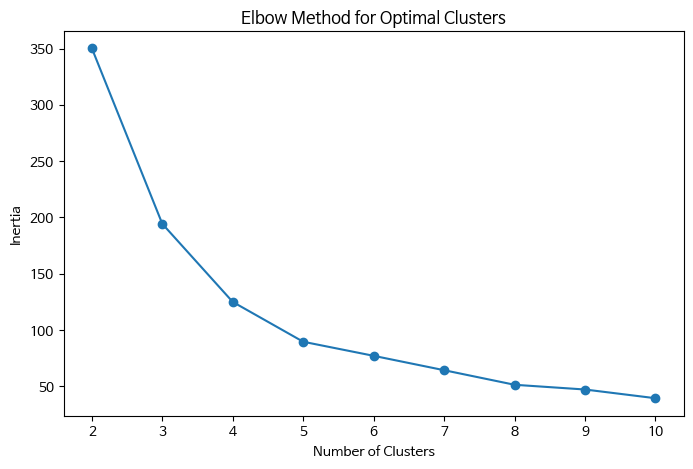

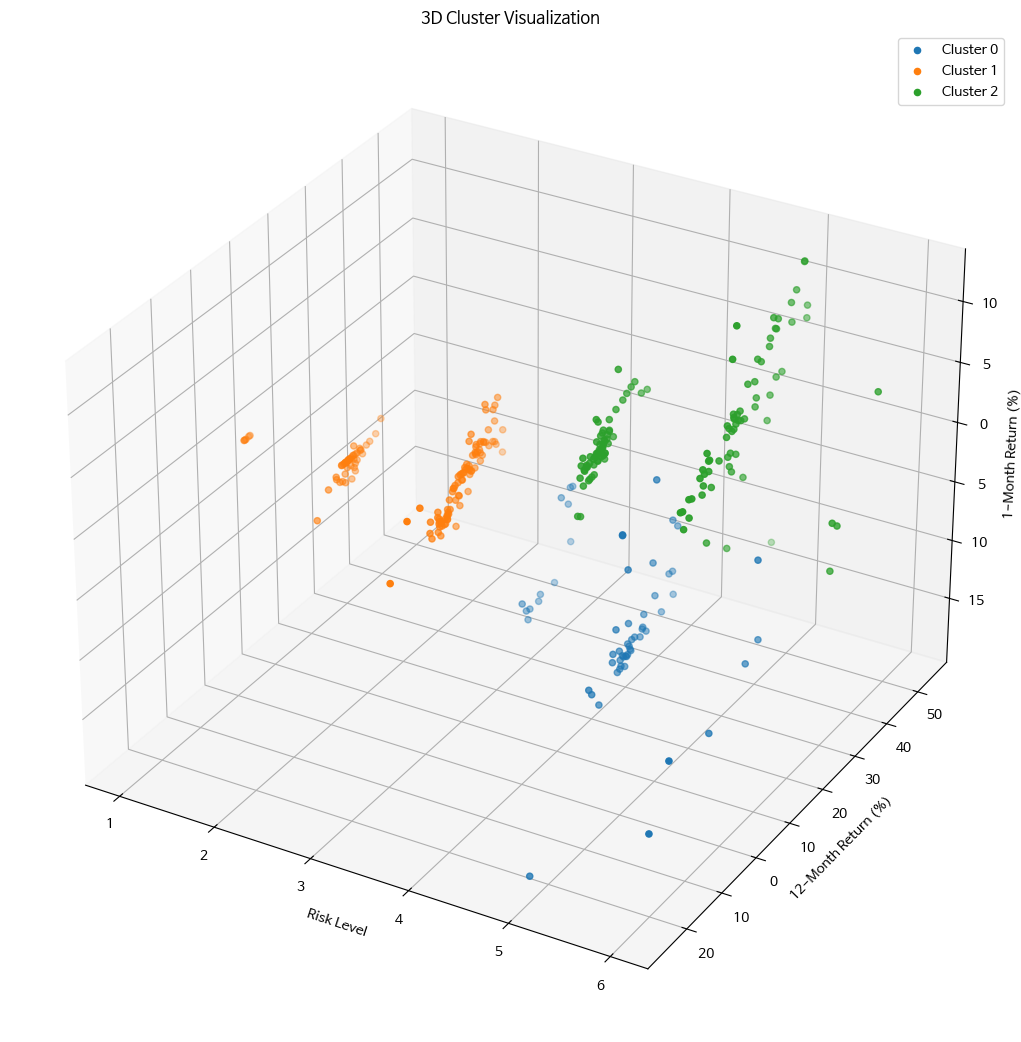

In [42]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


selected_columns = ['위험도','12개월 수익률(연환산수익률)(%)']
data = fund_item[selected_columns]


# 최적의 클러스터 수 찾기

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: 군집화 수행
# 최적의 군집 수 결정 (Elbow Method)
inertia = []
range_clusters = range(2, 11)  # 2~10개 클러스터 시도

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 최적의 군집 수 설정
optimal_clusters = 3

# KMeans 군집화
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, max_iter=500, tol=1e-6)
fund_item['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 3: 결과 해석


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_clusters):
    cluster_data = fund_item[fund_item['Cluster'] == cluster]
    ax.scatter(
        cluster_data['위험도'],
        cluster_data['12개월 수익률(연환산수익률)(%)'],
        cluster_data['1개월 수익률(연환산수익률)(%)'],
        label=f'Cluster {cluster}'
    )
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Risk Level')
ax.set_ylabel('12-Month Return (%)')
ax.set_zlabel('1-Month Return (%)')
ax.legend()
plt.show()



In [54]:
print(fund_item[fund_item['Cluster'] == 0][['Cluster','위험도','12개월 수익률(연환산수익률)(%)', '1개월 수익률(연환산수익률)(%)','6개월 수익률(연환산수익률)(%)']].head())
print(fund_item[fund_item['Cluster'] == 1][['Cluster','위험도','12개월 수익률(연환산수익률)(%)', '1개월 수익률(연환산수익률)(%)', '6개월 수익률(연환산수익률)(%)']].head())
print(fund_item[fund_item['Cluster'] == 2][['Cluster','위험도','12개월 수익률(연환산수익률)(%)', '1개월 수익률(연환산수익률)(%)', '6개월 수익률(연환산수익률)(%)']].head())

    Cluster  위험도  12개월 수익률(연환산수익률)(%)  1개월 수익률(연환산수익률)(%)  6개월 수익률(연환산수익률)(%)
4         0    5                14.47               -4.08               -8.53
5         0    5                 6.30               -5.48               -9.32
23        0    6                 6.50               -7.15              -10.39
28        0    4                14.18                0.65                2.42
37        0    5                 5.30               -7.07              -11.52
    Cluster  위험도  12개월 수익률(연환산수익률)(%)  1개월 수익률(연환산수익률)(%)  6개월 수익률(연환산수익률)(%)
0         1    3                12.55                0.47                4.46
7         1    2                 5.04               -0.63                0.32
8         1    3                 4.27               -2.26               -2.16
10        1    2                10.79                0.34                1.37
11        1    3                20.05                0.36                6.66
   Cluster  위험도  12개월 수익률(연환산수익률)(%)  1개월 수익률(연환산수익률)(%)  6개월 수익

cluster 0:

리스크는 있지만 장기적으로 보았을 때 높은 수익을 낼 수 있는 펀드상품들이 모여 있음

cluster 1:

낮은 위험도를 가진 안정적인 상품들이지만 수익률은 상대적으로 낮음.  

cluster 2:

높은 위험도에도 불구하고 저조한 수익률을 기록한 상품들. 이쪽 클러스터에 해당하는 상품들은 되도록이면 추천하지 않는게 바람직 할 듯

In [44]:
fund_item['Cluster'].value_counts()

,count
Cluster,
1,142
2,132
0,60


In [45]:
# fund_item.to_csv("1125_펀드상품데이터+clustering_result.csv", index=False)

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_labels = kmeans.fit_predict(scaled_data)

score = silhouette_score(scaled_data, cluster_labels)

In [47]:
score

0.5346316852954197